In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
from statistics import mean 
from matplotlib import colors as mcolors
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
# Read in the data csv
movies_2015_2024 = pd.read_csv('../data/movies_2015_2024.csv')

In [3]:
# Converting financial data to 2024 dollars
# Store CPI values
cpi_data = pd.read_csv('../data/CPI_data.csv').set_index('Year')
budget_2024 = []
for year,budget in zip(movies_2015_2024['Year'], movies_2015_2024['Budget']):
    budget_adjusted = budget*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    budget_2024.append(budget_adjusted)
# Reassign adjusted budget numbers to the Budget column
movies_2015_2024['Budget'] = budget_2024
revenue_2024 = []
for year,revenue in zip(movies_2015_2024['Year'], movies_2015_2024['Revenue']):
    revenue_adjusted = revenue*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    revenue_2024.append(revenue_adjusted)
# Reassign adjusted budget numbers to the Revenue column
movies_2015_2024['Revenue'] = revenue_2024
# Dropping zero values from budget and revenue
movies_2015_2024 = movies_2015_2024[~((movies_2015_2024['Revenue'].round() == 0.0) | (movies_2015_2024['Budget'].round() == 0.0))]
movies_2015_2024['Profit'] = movies_2015_2024['Revenue'].sub(movies_2015_2024['Budget'], axis=0)
movies_2015_2024['Profitable'] = movies_2015_2024['Profit'] > 0
movies_2015_2024.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Profit,Profitable
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08,True


#### Exploratory Question: How do budget and revenue vary by year or by genre? #5

In [5]:
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
movies_exploded = movies_2015_2024.explode('Genre', ignore_index = False)
movies_exploded.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Profit,Profitable
0,Avengers: Age of Ultron,2015,Action,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True


In [6]:
# Convert the Budget, Revenue, and Profit columns from scientific notation to integers
movies_2015_2024['Budget'] = movies_2015_2024['Budget'].astype('int64') 
movies_2015_2024['Revenue'] = movies_2015_2024['Revenue'].astype('int64')
movies_2015_2024['Profit'] = movies_2015_2024['Profit'].astype('int64')

In [7]:
movies_2015_2024.nlargest(3, "Revenue")

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,Profit,Profitable
401,Avengers: Endgame,2019,"[Adventure, Science Fiction, Action]",8.237,26930,436809021,3434888353,299534,2998079332,True
6,Star Wars: The Force Awakens,2015,"[Adventure, Action, Science Fiction]",7.254,20076,324254399,2737267792,140607,2413013393,True
300,Avengers: Infinity War,2018,"[Adventure, Action, Science Fiction]",8.235,31141,374767330,2563927015,299536,2189159685,True


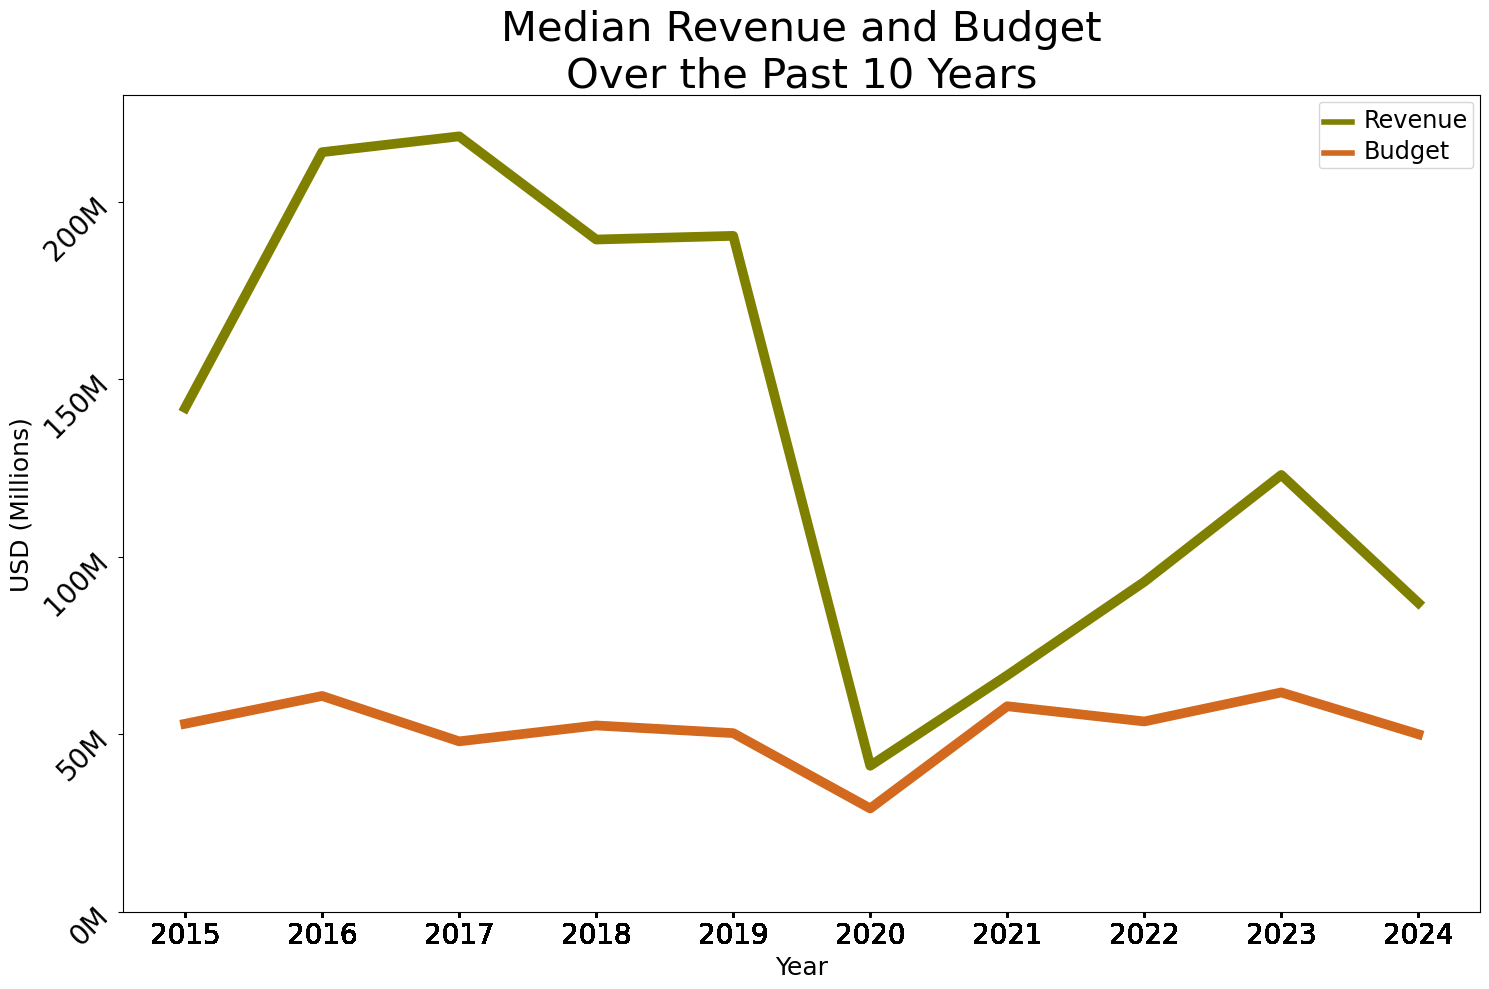

In [46]:
# 
median_rev_by_year = movies_2015_2024.groupby('Year')['Revenue'].median().reset_index()
median_budget_by_year = movies_2015_2024.groupby('Year')['Budget'].median().reset_index()

years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(15, 10))
median_rev_by_year.plot(ax=ax, x='Year', y='Revenue', kind='line', color='olive', linewidth=7.0, ylim=(0,230000000))
median_budget_by_year.plot(ax=ax, x='Year', y='Budget', kind='line', color='chocolate', linewidth=7.0)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.set_xticks(movies_2015_2024["Year"])
ax.set_xticklabels(movies_2015_2024["Year"], rotation=0, fontsize=20)
ax.set_xlabel('Year', fontsize=18)

plt.yticks(rotation=45, fontsize = 20);
ax.set_ylabel('USD (Millions)', fontsize=18)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

ax.set_title('Median Revenue and Budget\nOver the Past 10 Years', fontsize = 30)
ax.legend(fontsize = 20)

leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('xx-large')
plt.tight_layout()
plt.savefig('../assets/rev_budget_by_year.png', dpi = 150);
#plt.show();


In [9]:
df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df

,Genre,variable,value
0,Action,Revenue,1.860034e+09
1,Adventure,Revenue,1.860034e+09
2,Science Fiction,Revenue,1.860034e+09
3,Action,Revenue,5.014142e+08
4,Adventure,Revenue,5.014142e+08
...,...,...,...
4571,Drama,Budget,8.235955e+07
4572,Romance,Budget,8.235955e+07
4573,Music,Budget,8.235955e+07
4574,Drama,Budget,2.320000e+07


In [10]:
df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Budget/Revenue'})
#df['value'] = (df['value'] / 10000000)
df['value'] = np.log10(df['value']+1)
df.head(2)

,Genre,Budget/Revenue,value
0,Action,Revenue,9.269521
1,Adventure,Revenue,9.269521


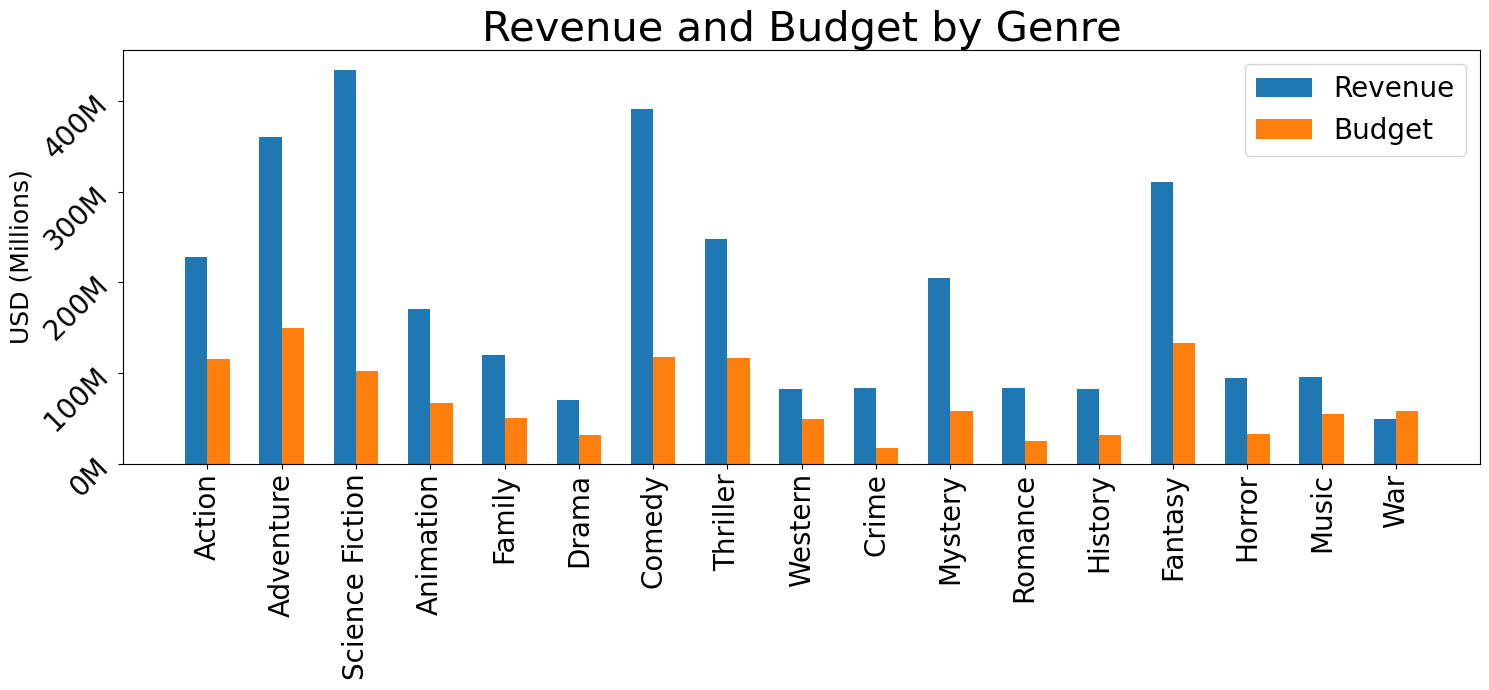

In [11]:

median_budget_by_year = movies_exploded.groupby('Genre')['Budget'].median()#.reset_index()
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median()#.reset_index()

w, x = 0.3, np.arange(len(movies_exploded["Genre"].unique()))

fig, ax = plt.subplots(figsize=(15, 7))

ax.bar(x - w/2, median_rev_by_year, width=w, label="Revenue")
ax.bar(x + w/2, median_budget_by_year, width=w, label='Budget')

ax.set_xticks(x)
ax.set_xticklabels(movies_exploded["Genre"].unique(), rotation=90, fontsize=20)

plt.yticks(rotation=45, fontsize = 20);
ax.set_ylabel('USD (Millions)', fontsize=18)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))

ax.set_title('Revenue and Budget by Genre', fontsize = 30)
ax.legend(fontsize = 20)

plt.tight_layout()
plt.savefig('../assets/rev_budget_by_genre.png', dpi = 150);
#ax.set_xticklabels(rotation=90)

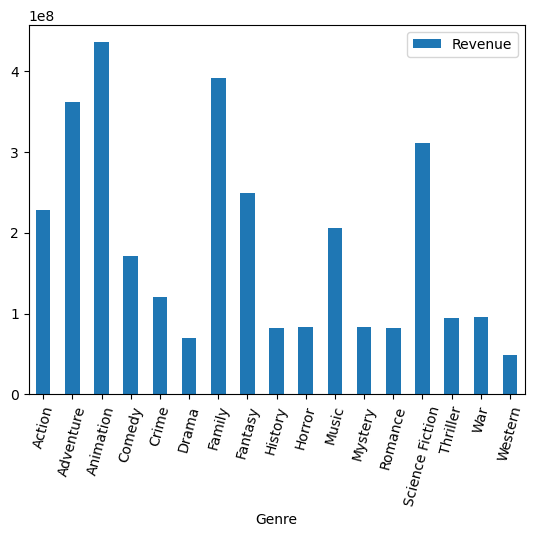

In [12]:
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median().reset_index()
median_rev_by_year.plot(x='Genre', y='Revenue', kind='bar')
plt.xticks(rotation = 75);

<Axes: xlabel='Genre'>

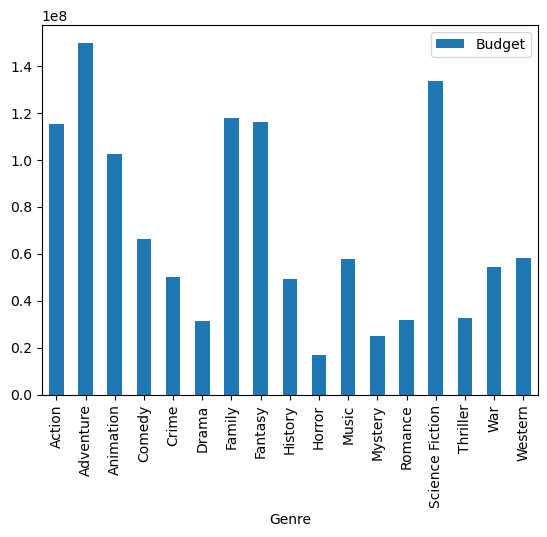

In [13]:
median_budget_by_year = movies_exploded.groupby('Genre')['Budget'].median().reset_index()
median_budget_by_year.plot(x='Genre', y='Budget', kind='bar')

In [14]:
df

,Genre,Budget/Revenue,value
0,Action,Revenue,9.269521
1,Adventure,Revenue,9.269521
2,Science Fiction,Revenue,9.269521
3,Action,Revenue,8.700197
4,Adventure,Revenue,8.700197
...,...,...,...
4571,Drama,Budget,7.915714
4572,Romance,Budget,7.915714
4573,Music,Budget,7.915714
4574,Drama,Budget,7.365488
